#**Gold Price Predictor**
using Silver (SLV), Oil (USO), EUR/USD, S&P 500

My model helps small investors understand gold price sensitivity to macro-economic indicators.

Importing pandas, numpy and matplotlib

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data set: https://chatgpt.com/c/6968f6bc-5174-8326-8e31-00390ba4ca73

In [77]:
data = pd.read_csv('/content/archive.zip')

df = pd.DataFrame(data)
print(df.head())

       Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099


Analysing the columns

In [78]:
col = df.columns
print(col)
print(type(col))

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')
<class 'pandas.core.indexes.base.Index'>


Gathering information about DataSet

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


Checking the missing values

In [80]:
missing = df.isna().sum()
print(missing)

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64


There are no missing value in the data

finding the total number of row and colums

In [81]:
df.shape

(2290, 6)

Converting the date from object to DateTime

In [82]:
df['Date'] = df['Date'].astype('datetime64[ns]')
print(type(df['Date']))

<class 'pandas.core.series.Series'>


Set date as index

In [83]:
df.set_index('Date', inplace=True)
print(df.head())

                    SPX        GLD        USO     SLV   EUR/USD
Date                                                           
2008-01-02  1447.160034  84.860001  78.470001  15.180  1.471692
2008-01-03  1447.160034  85.570000  78.370003  15.285  1.474491
2008-01-04  1411.630005  85.129997  77.309998  15.167  1.475492
2008-01-07  1416.180054  84.769997  75.500000  15.053  1.468299
2008-01-08  1390.189941  86.779999  76.059998  15.590  1.557099


Plotting the graph to analyze data

1. graph of gold price

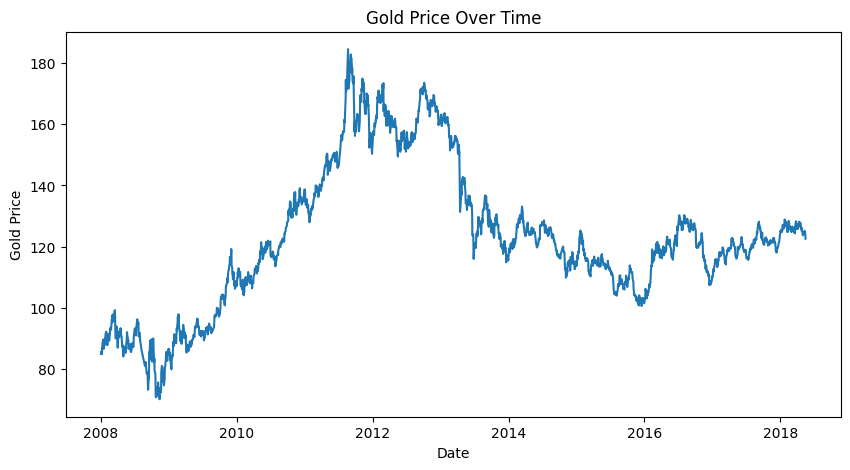

In [84]:
plt.figure(figsize=(10,5))
plt.plot(df['GLD'])
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Price Over Time')
plt.show()

2. Ploting price of gold against Silver

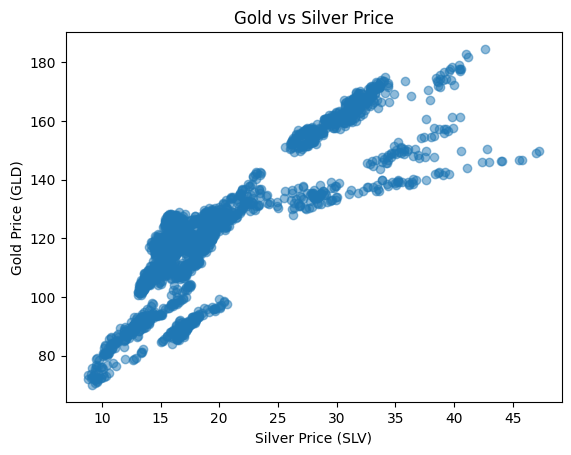

In [85]:
plt.scatter(df['SLV'], df['GLD'], alpha=0.5)
plt.xlabel("Silver Price (SLV)")
plt.ylabel("Gold Price (GLD)")
plt.title("Gold vs Silver Price")
plt.show()

3. Ploting price of gold against Oil

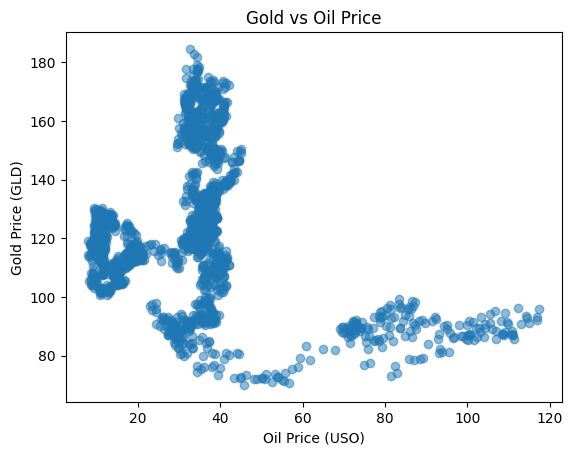

In [86]:
plt.scatter(df['USO'], df['GLD'], alpha=0.5)
plt.xlabel("Oil Price (USO)")
plt.ylabel("Gold Price (GLD)")
plt.title("Gold vs Oil Price")
plt.show()

4. Ploting price of gold against spx

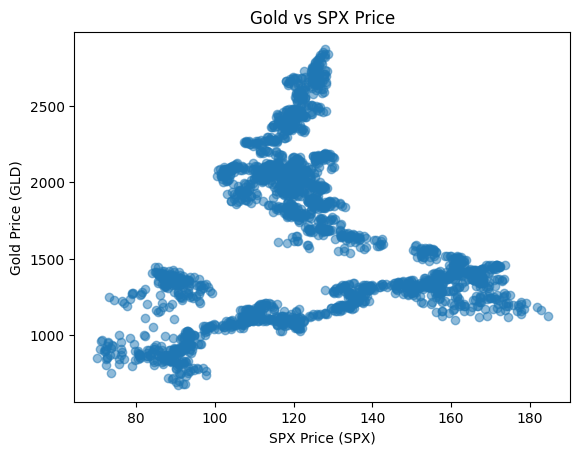

In [87]:
plt.scatter(df['GLD'], df['SPX'], alpha=0.5)
plt.xlabel("SPX Price (SPX)")
plt.ylabel("Gold Price (GLD)")
plt.title("Gold vs SPX Price")
plt.show()

5. Ploting price of gold against EUR/USD

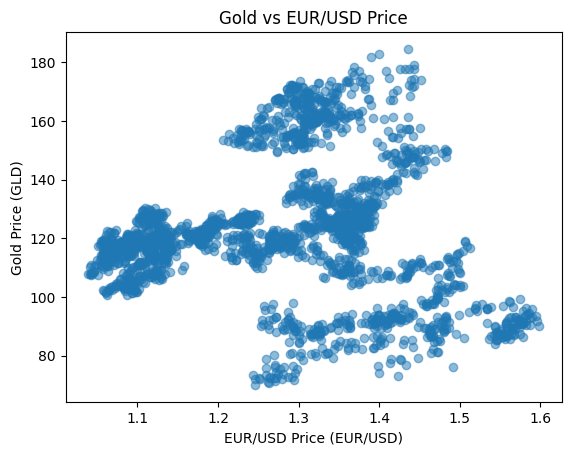

In [88]:
plt.scatter(df['EUR/USD'], df['GLD'], alpha=0.5)
plt.xlabel("EUR/USD Price (EUR/USD)")
plt.ylabel("Gold Price (GLD)")
plt.title("Gold vs EUR/USD Price")
plt.show()

Comparing the features with the gold

In [89]:
X = df.drop('GLD', axis=1)
y = df['GLD']

Train and Test split

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Train the Model using linear Regression

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [94]:
y_pred = model.predict(x_test)

Comparing prediction vs Actual value

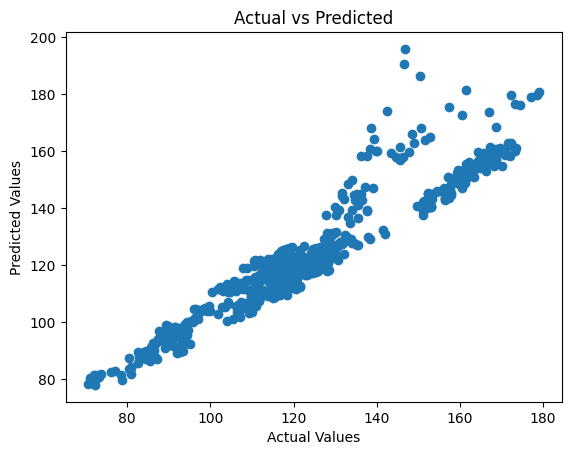

In [95]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

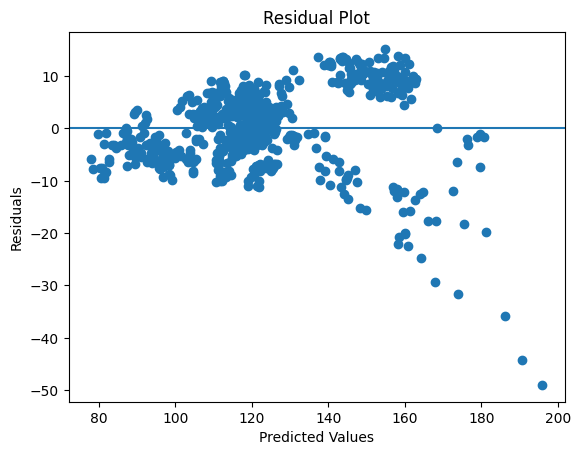

In [96]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

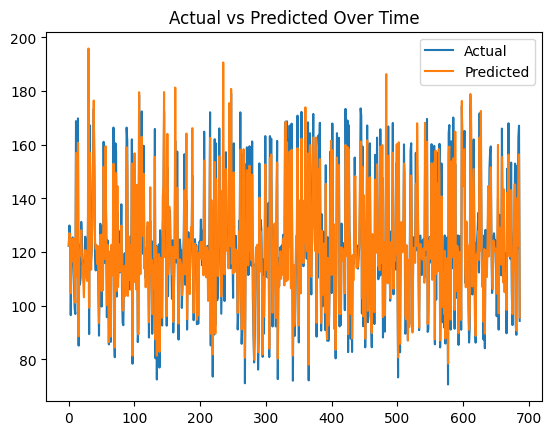

In [97]:
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Over Time")
plt.show()

**from the above graphs we can see that the linear regression is not the right fit as the price of gold is not linear**

Calculating metrices

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [99]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [100]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 5.860663087242591
Mean Squared Error: 58.06464621212005
Root Mean Squared Error: 7.620016155633796
R-squared: 0.8946218884172447


Using RandomForestRegression

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(x_train, y_train)

y_pred_rfl = model.predict(x_test)

Plotting the graph again t analyze the result

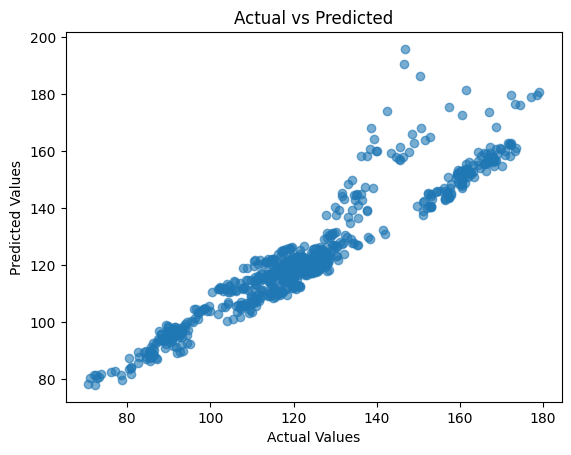

In [103]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

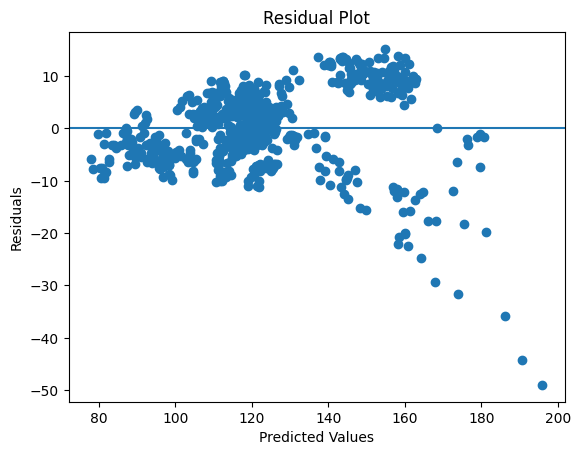

In [104]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

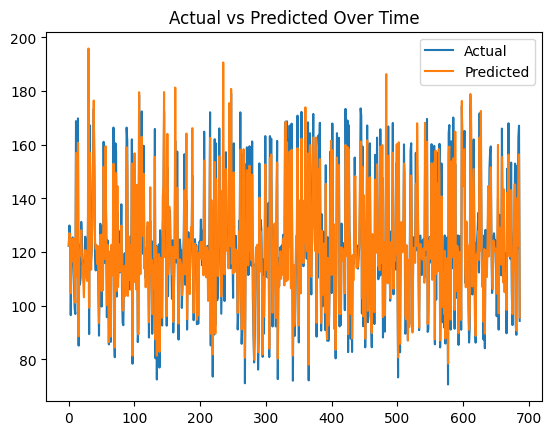

In [105]:
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Over Time")
plt.show()

Calculating metrices

In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [107]:
mae_rfl = mean_absolute_error(y_test, y_pred)
mse_rfl = mean_squared_error(y_test, y_pred)
rmse_rfl = np.sqrt(mse)
r2_rfl = r2_score(y_test, y_pred)

In [108]:
print("Mean Absolute Error:", mae_rfl)
print("Mean Squared Error:", mse_rfl)
print("Root Mean Squared Error:", rmse_rfl)
print("R-squared:", r2_rfl)

Mean Absolute Error: 5.860663087242591
Mean Squared Error: 58.06464621212005
Root Mean Squared Error: 7.620016155633796
R-squared: 0.8946218884172447


Comparing Linear Regression and Random Forest Regression

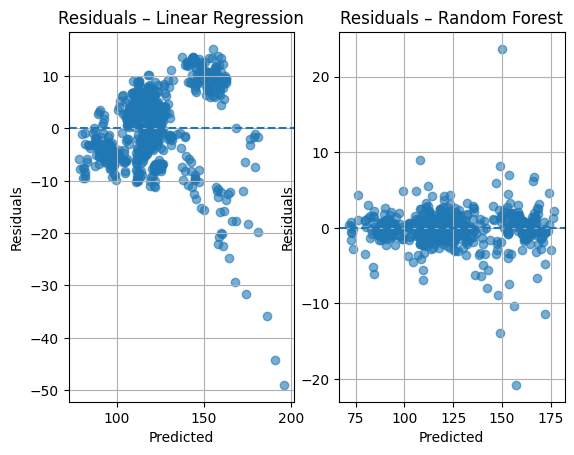

In [109]:
# Linear Regression residuals
plt.subplot(1,2,1)
plt.scatter(y_pred, y_test - y_pred, alpha=0.6)
plt.axhline(0, linestyle='--')
plt.title("Residuals – Linear Regression")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.grid(True)

# Random Forest residuals
plt.subplot(1,2,2)
plt.scatter(y_pred_rfl, y_test - y_pred_rfl, alpha=0.6)
plt.axhline(0, linestyle='--')
plt.title("Residuals – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.grid(True)